# London Housing and Population Analysis (2002 - 2015 data)

## 5. London Population Over Time

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('C:/Users/csmyth/Desktop/Code/london_housing_eda/population_dataset_sya.csv', index_col=[0])

# Confirm data set structure:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8918 entries, 0 to 8917
Columns: 186 entries, ward_code to f90plus
dtypes: int64(183), object(3)
memory usage: 12.7+ MB


In [8]:
df['year'] = df['year'].astype('str')
populations = df.drop(columns=['ward_code', 'ward_name']).copy()
populations = populations.groupby(['borough', 'year']).sum(numeric_only=True).unstack(level=-1)
ages = populations.unstack(level=0).reset_index()
ages = ages.rename(columns={'level_0': 'gender_age', 0: 'population'})

# Remove formatting and change string to int to enable population counts:
ages.loc[ages['gender_age'].str.contains('m'), 'gender'] = 'male'
ages.loc[ages['gender_age'].str.contains('f'), 'gender'] = 'female'
ages['gender_age'] = [int(i[1:3]) for i in ages['gender_age']]
ages = ages.rename(columns={'gender_age': 'age'})

""" Limitation: '90plus' rendered simply as '90'.  Check implications: """

ninety_plus = ages['age'][ages['age'] == 90].sum()
all_ages = ages['population'].sum()
ninety_plus_pct = 100 * ninety_plus / all_ages

""" Assumption: little implication of considering 90+ == 90 as this represents 0.5% of the overall population. """


# Calculate mean age per borough:
""" 
Can this measure be useful? 
This analysis section is incomplete.
"""
ages['fx'] = ages['age'] * ages['population']
cum_f = ages.groupby(['borough', 'year']).agg({'population': np.sum, 'fx': np.sum}).reset_index()
""" Limitation - Children <1 not considered.  Assumption: count also negligible"""
cum_f['mean_age'] = (cum_f['fx'] / cum_f['population']).astype('int64')
five_lowest_means = cum_f[['borough', 'year', 'mean_age']].sort_values(by='mean_age', ascending=True).head().to_markdown()

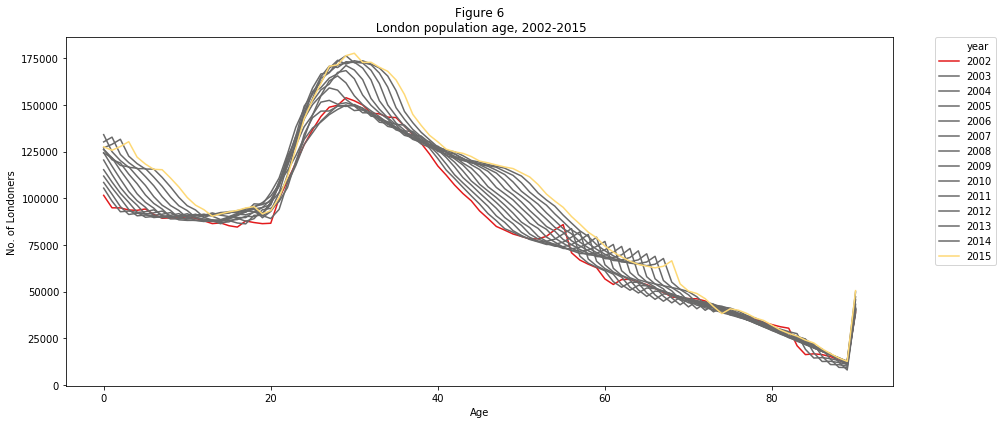

In [9]:
# Show overall London population over time:
london_pop = ages.groupby(['year','age']).agg({'population': np.sum, 'fx': np.sum}).reset_index()
years = london_pop['year'].unique().tolist()
fig, ax = plt.subplots(figsize=(14, 6))
pal = {year: "#e31a1c" if year == '2002' else  "#fed976" if year == '2015' else "dimgrey" for year in years}
ax = sns.lineplot(data=london_pop, x='age', y='population', hue='year', palette=pal)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Figure 6\n London population age, 2002-2015', fontsize=12)
plt.xlabel('Age')
plt.ylabel('No. of Londoners')
plt.tight_layout()
plt.savefig('Fig6_London_population_age_2002_2015.png')
plt.show()


London population increased overall between 2002-2015, particularly among ages 25-35 and 60-70.    
There is no significance difference in the number of Londoners aged 18-22 or ~40.    
Possible explanations include that more young people are leaving London to study elsewhere and more mid-life professionals are moving out to the suburbs.    
This would correlate with house sales activity in the South East and East of England ( _Average View, EDA_ _2_ ). 
